# Throughout the exercises for Regression in Python lessons, you will use the following example scenario: 
### As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

#### Do your work for these exercises in a jupyter notebook named `scaling`. Use the `telco` dataset. 
- Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

import prepare

In [4]:
df = prepare.clean_telco(prepare.get_telco())

In [5]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [6]:
df.shape

(1695, 3)

In [7]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1695 non-null   float64
 1   tenure           1695 non-null   int64  
 2   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 53.0+ KB


In [9]:
train, validate, test = prepare.prepare_telco()

In [10]:
train, validate, test

(             monthly_charges  tenure  total_charges
 customer_id                                        
 6418-PIQSP             81.00      62        4985.90
 4573-JKNAE             19.35      12         212.30
 3258-ZKPAI            116.60      72        8337.45
 2388-LAESQ            114.85      72        8317.95
 8823-RLPWL            110.65      72        8065.65
 ...                      ...     ...            ...
 0707-HOVVN             75.50      70        5212.65
 7977-HXJKU             19.60      21         397.00
 1527-SXDPN             96.25      52        4990.25
 5304-EFJLP            111.65      72        8022.85
 0815-MFZGM             99.00      42        4135.00
 
 [949 rows x 3 columns],
              monthly_charges  tenure  total_charges
 customer_id                                        
 5242-UOWHD             20.35      45         929.20
 7101-HRBLJ             83.70      72        6096.90
 0078-XZMHT             85.15      72        6316.20
 8711-LOBKY        

In [11]:
train.shape, validate.shape, test.shape

((949, 3), (407, 3), (339, 3))

# 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

####  Min-Max Scaler

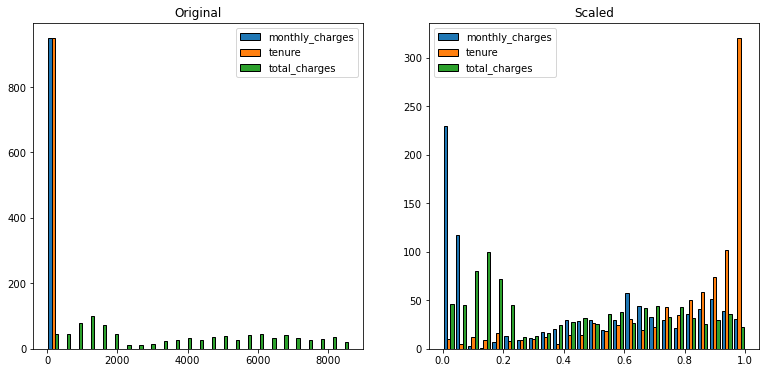

In [25]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the TRAINING data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train);

# Min-max Inverse

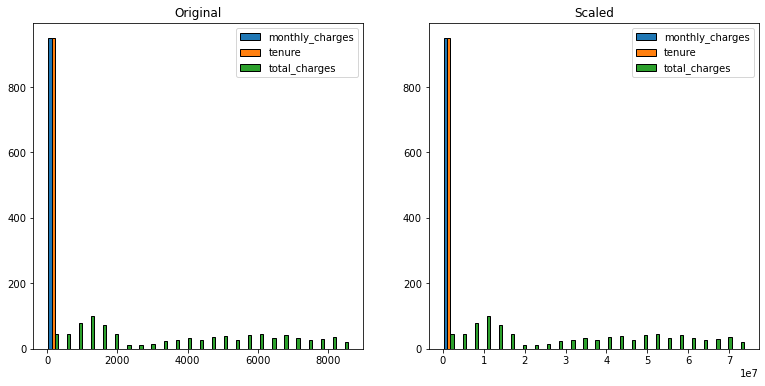

In [27]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

#### Standard Scalar

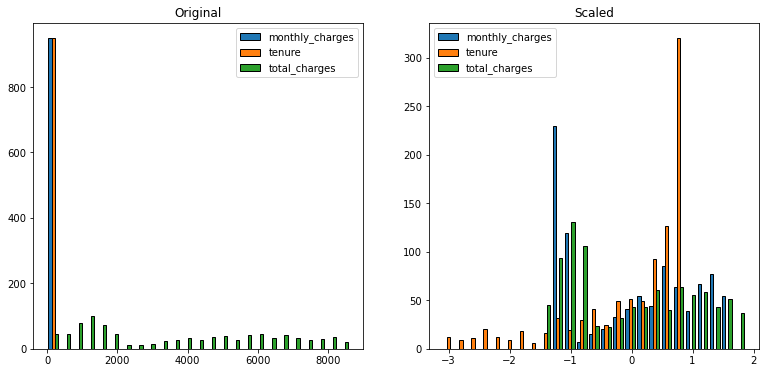

In [28]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

# Standard Inverse

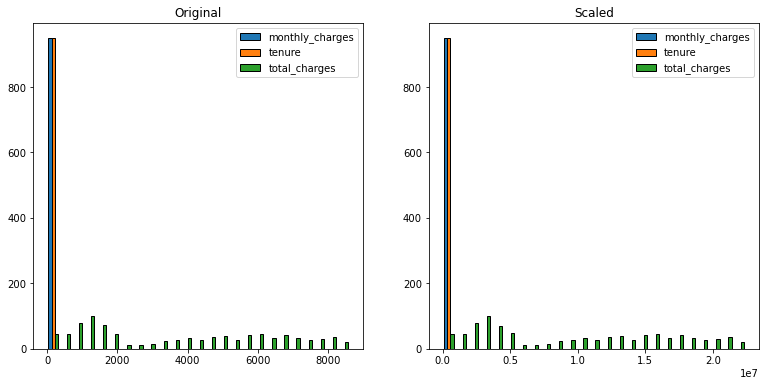

In [29]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

#### Robust Scaler

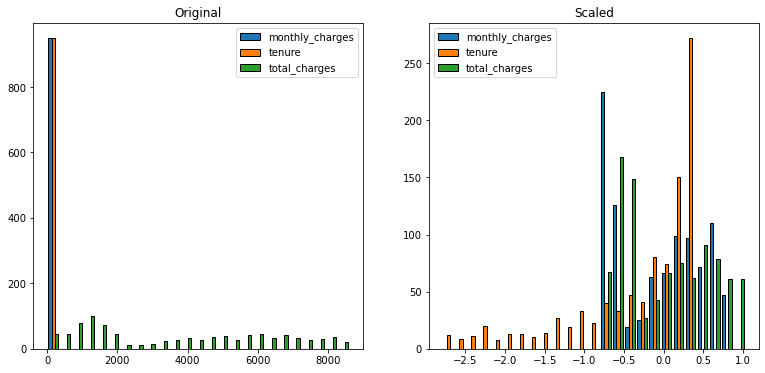

In [23]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

# 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

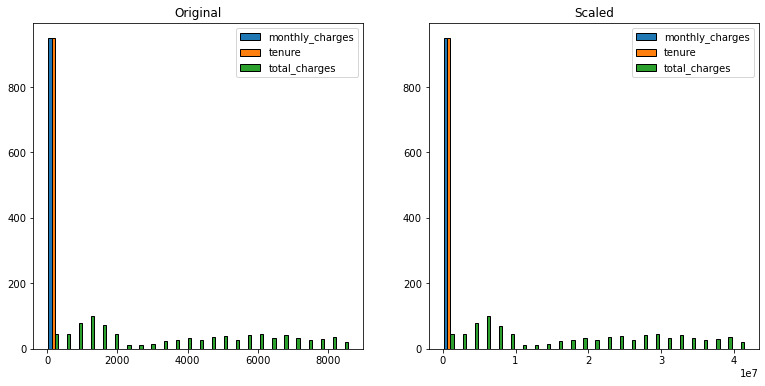

In [22]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

# 3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

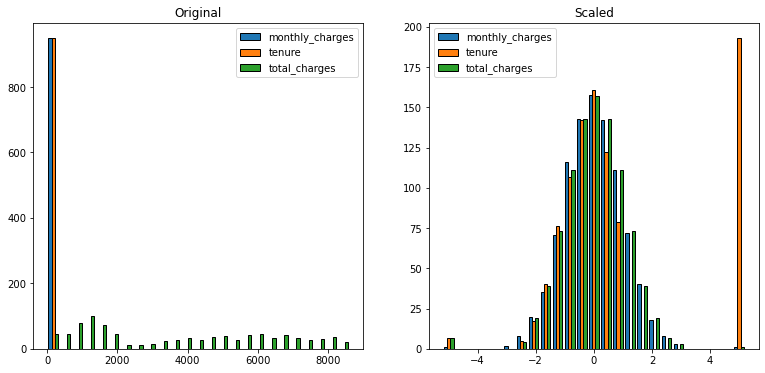

In [30]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

# 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

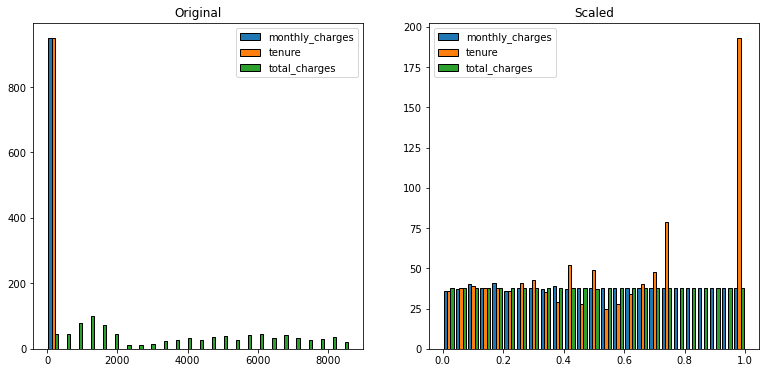

In [32]:
scaler = sklearn.preprocessing.QuantileTransformer()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)
plt.show()

# 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [2]:
train, validate, test = prepare.prepare_telco()

In [3]:
train_scaled, validate_scaled, test_scaled = prepare.scaled_telco(train, validate, test)

In [4]:
train_scaled, validate_scaled, test_scaled

(     monthly_charges    tenure  total_charges
 0           0.624750  0.861111       0.580134
 1           0.009481  0.166667       0.024702
 2           0.980040  1.000000       0.970103
 3           0.962575  1.000000       0.967834
 4           0.920659  1.000000       0.938477
 ..               ...       ...            ...
 944         0.569860  0.972222       0.606517
 945         0.011976  0.291667       0.046193
 946         0.776946  0.722222       0.580640
 947         0.930639  1.000000       0.933497
 948         0.804391  0.583333       0.481127
 
 [949 rows x 3 columns],
      monthly_charges    tenure  total_charges
 0           0.019461  0.625000       0.108117
 1           0.651697  1.000000       0.709404
 2           0.666168  1.000000       0.734920
 3           0.014471  0.819444       0.138259
 4           0.695609  0.847222       0.643064
 ..               ...       ...            ...
 402         0.604291  1.000000       0.666731
 403         0.874251  0.986111  

In [5]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.624750,0.861111,0.580134
1,0.009481,0.166667,0.024702
2,0.980040,1.000000,0.970103
3,0.962575,1.000000,0.967834
4,0.920659,1.000000,0.938477
